In [13]:
import tensorflow as tf

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

2023-12-27 11:31:24.179672: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 11:31:26.038658: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 11:31:31.288543: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 11:31:31.288813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 11:31:32.105580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

#### Create the image data generator object to read images

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

#### Read the images

In [5]:
train_dataset = train_datagen.flow_from_directory('/home/dai/Documents/NLP & CV/Datasets/imagenet-new/train', 
                                          class_mode = 'categorical', 
                                          batch_size = 32,
                                          target_size=(64,64))

Found 5000 images belonging to 10 classes.


In [7]:
train_dataset.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [8]:
train_dataset.filenames

['crocodile/images/n01698640_0.JPEG',
 'crocodile/images/n01698640_1.JPEG',
 'crocodile/images/n01698640_10.JPEG',
 'crocodile/images/n01698640_100.JPEG',
 'crocodile/images/n01698640_101.JPEG',
 'crocodile/images/n01698640_102.JPEG',
 'crocodile/images/n01698640_103.JPEG',
 'crocodile/images/n01698640_104.JPEG',
 'crocodile/images/n01698640_105.JPEG',
 'crocodile/images/n01698640_106.JPEG',
 'crocodile/images/n01698640_107.JPEG',
 'crocodile/images/n01698640_108.JPEG',
 'crocodile/images/n01698640_109.JPEG',
 'crocodile/images/n01698640_11.JPEG',
 'crocodile/images/n01698640_110.JPEG',
 'crocodile/images/n01698640_111.JPEG',
 'crocodile/images/n01698640_112.JPEG',
 'crocodile/images/n01698640_113.JPEG',
 'crocodile/images/n01698640_114.JPEG',
 'crocodile/images/n01698640_115.JPEG',
 'crocodile/images/n01698640_116.JPEG',
 'crocodile/images/n01698640_117.JPEG',
 'crocodile/images/n01698640_118.JPEG',
 'crocodile/images/n01698640_119.JPEG',
 'crocodile/images/n01698640_12.JPEG',
 'croco

In [9]:
def build_cnn(input_shape=(64,64,3), num_classes = 10):
    """"Defines a CNN model with specified input shape and number of classes."""
    model =Sequential()
    model.add(Conv2D(32,(3,3),activation = 'relu',
                     input_shape = input_shape))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(64,(3,3),activation = 'relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

In [10]:
model = build_cnn()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                1

In [15]:
from tensorflow.keras.utils import plot_model

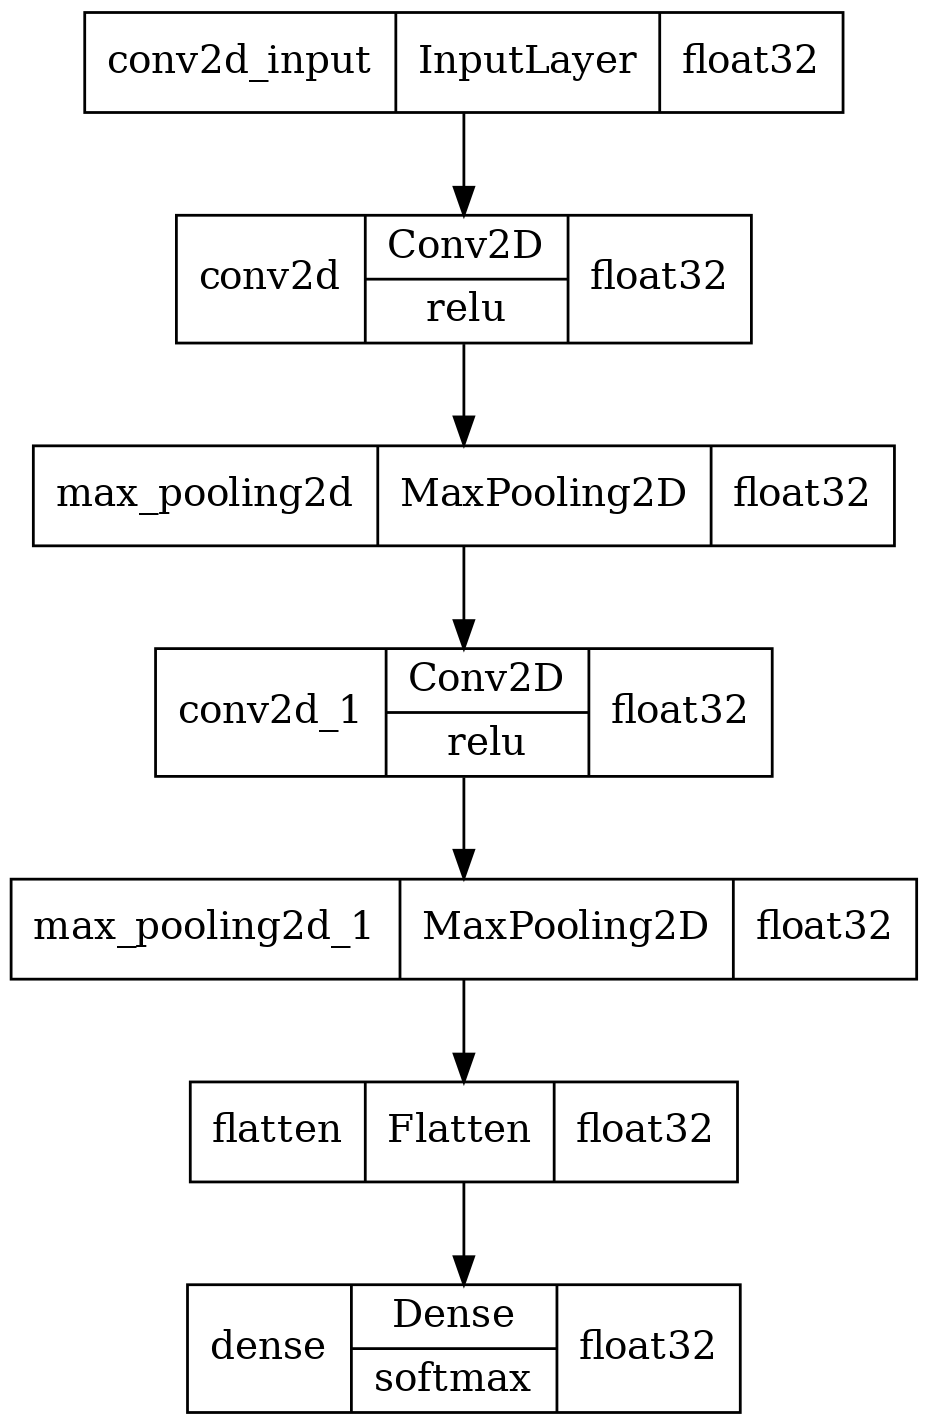

In [16]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, dpi=200)

#### Compile the model

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.fit(train_dataset, epochs=10, batch_size=10)

Epoch 1/10
157/157 [==============================] - 16s 100ms/step - loss: 0.5655 - accuracy: 0.8134
Epoch 2/10
157/157 [==============================] - 15s 96ms/step - loss: 0.5759 - accuracy: 0.8020
Epoch 3/10
157/157 [==============================] - 15s 97ms/step - loss: 0.5438 - accuracy: 0.8118
Epoch 4/10
157/157 [==============================] - 15s 95ms/step - loss: 0.5369 - accuracy: 0.8062
Epoch 5/10
157/157 [==============================] - 15s 96ms/step - loss: 0.5067 - accuracy: 0.8226
Epoch 6/10
157/157 [==============================] - 16s 99ms/step - loss: 0.5163 - accuracy: 0.8248
Epoch 7/10
157/157 [==============================] - 15s 98ms/step - loss: 0.5147 - accuracy: 0.8220
Epoch 8/10
157/157 [==============================] - 16s 101ms/step - loss: 0.4930 - accuracy: 0.8256
Epoch 9/10
157/157 [==============================] - 15s 94ms/step - loss: 0.4895 - accuracy: 0.8272
Epoch 10/10
157/157 [==============================] - 16s 100ms/step - loss: 0.

In [21]:
new = plt.imread('/home/dai/Documents/NLP & CV/Datasets/imagenet-new/test/images/test_21.JPEG')

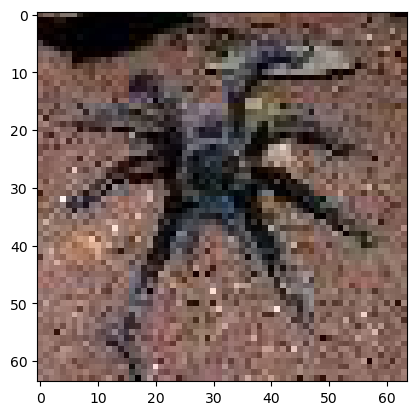

In [22]:
plt.imshow(new)

In [34]:
labels_dict = train_dataset.class_indices
labels_dict

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [41]:
labels = {v : k for k, v in labels_dict.items()}
labels

{0: 'crocodile',
 1: 'fish',
 2: 'fossils',
 3: 'frog',
 4: 'insect',
 5: 'reptiles',
 6: 'scorpion',
 7: 'snake',
 8: 'spider',
 9: 'toad'}

In [42]:
labels[4]

'insect'

In [58]:
def predict(img):
    img = img.reshape(1,64,64,3)
    prediction = model.predict(img, verbose =0)
    result =  np.argmax(prediction)
    return labels[result]

In [44]:
predict(new)

1/1 [==============================] - 0s 40ms/step


'insect'

In [74]:
test = test_datagen.flow_from_directory('/home/dai/Documents/NLP & CV/Datasets/imagenet-new/sample', target_size=(64,64))

Found 11 images belonging to 1 classes.


In [75]:
file_names = test.filenames
file_names

['test/val_118.JPEG',
 'test/val_130.JPEG',
 'test/val_166.JPEG',
 'test/val_192.JPEG',
 'test/val_205.JPEG',
 'test/val_248.JPEG',
 'test/val_280.JPEG',
 'test/val_286.JPEG',
 'test/val_294.JPEG',
 'test/val_305.JPEG',
 'test/val_75.JPEG']

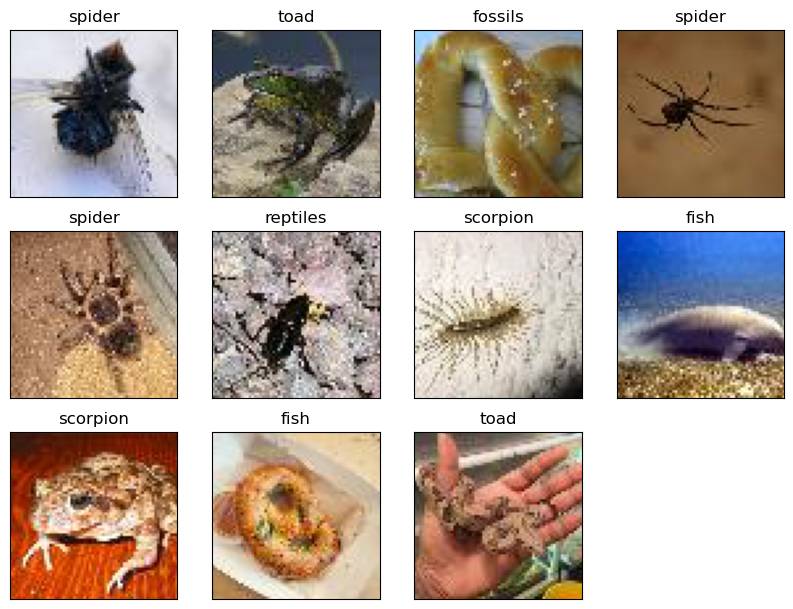

In [80]:
j = 1
plt.figure(figsize=(10,10))
for i in file_names:
    img = plt.imread('/home/dai/Documents/NLP & CV/Datasets/imagenet-new/sample/'+i)
    plt.subplot(4,4,j)
    plt.imshow(img)
    plt.title(predict(img))
    plt.xticks([])
    plt.yticks([])
    j += 1

plt.show()
    

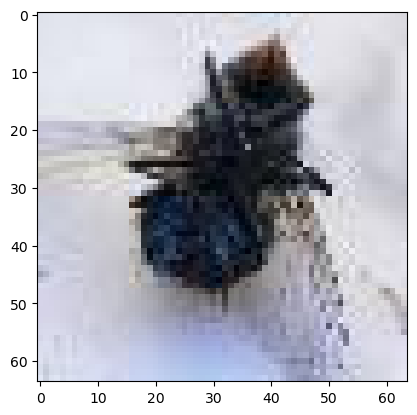

In [77]:
test_image = plt.imread('/home/dai/Documents/NLP & CV/Datasets/imagenet-new/sample/test/val_118.JPEG')
plt.imshow(test_image)

In [78]:
import os
import cv2

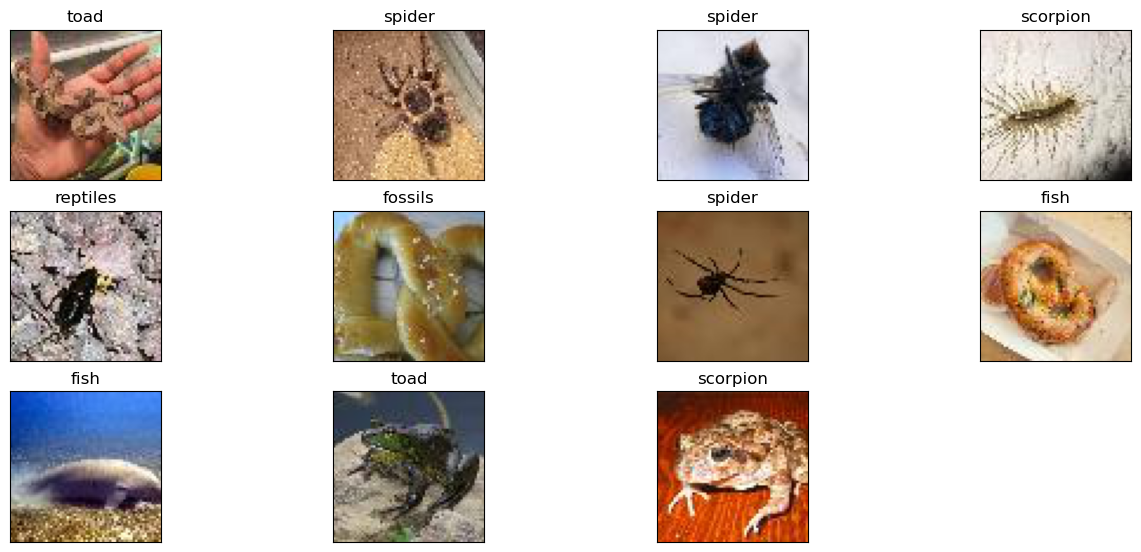

In [79]:
plt.figure(figsize=(16,9))
folder_path = '/home/dai/Documents/NLP & CV/Datasets/imagenet-new/sample/test'
image_filenames = [img for img in os.listdir(folder_path)]
i = 1
for image_filename in image_filenames:
    img_path = os.path.join(folder_path, image_filename)
    img = plt.imread(img_path)
    plt.subplot(4,4,i)
    plt.title(predict(img))
    plt.xticks([]),plt.yticks([])
    plt.imshow(img)
    i += 1

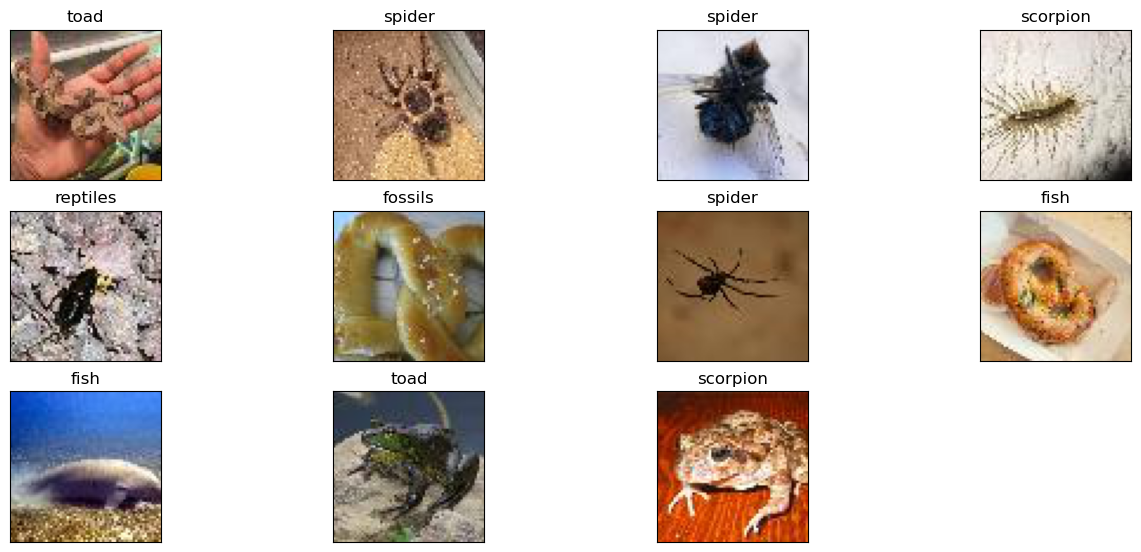

In [81]:
plt.figure(figsize=(16,9))
folder_path = '/home/dai/Documents/NLP & CV/Datasets/imagenet-new/sample/test'
image_filenames = [img for img in os.listdir(folder_path)]
i = 1
for image_filename in image_filenames:
    img_path = os.path.join(folder_path, image_filename)
    img = plt.imread(img_path)
    plt.subplot(4,4,i)
    plt.xticks([]),plt.yticks([])
    plt.imshow(img)
    test_image = np.expand_dims(img, axis = 0)
    prediction = np.argmax(model.predict(test_image, verbose=0))
    keys = [key for key, val in train_dataset.class_indices.items() if val == prediction]
    plt.title(keys[0])
    i += 1